In [223]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings
#import sktime

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler


# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, add_changepoints_to_plot
# from keras.models import Sequential
# from keras.layers import Dense

# from keras.optimizers import Adam

warnings.filterwarnings('ignore')

In [224]:
metrics_df = pd.DataFrame(columns=['Model', 'MAE', 'mase'])
metrics_df

,Model,MAE,mase


In [225]:
def mean_absolute_scaled_error(y_true, y_pred):
    naive_forecast = np.array(y_true[:-1])
    y_true_insample = np.array(y_true[1:])
    insample_error = np.abs(y_true_insample - naive_forecast)
    # Calculate the forecast errors
    forecast_error = np.abs(y_true - y_pred)
    # Calculate the MASE
    mase = np.mean(forecast_error) / np.mean(insample_error)
    return mase


In [226]:
czech  = pd.read_csv('univariate_models/univariate_df_Czechia.csv')
eston  = pd.read_csv('univariate_models/univariate_df_Estonia.csv')
franc  = pd.read_csv('univariate_models/univariate_df_France.csv')
malay  = pd.read_csv('univariate_models/univariate_df_Malaysia.csv')
belgi  = pd.read_csv('univariate_models/univariate_df_Belgium.csv')
chile  = pd.read_csv('univariate_models/univariate_df_Chile.csv')
irela  = pd.read_csv('univariate_models/univariate_df_Ireland.csv')
israe  = pd.read_csv('univariate_models/univariate_df_Israel.csv')
italy  = pd.read_csv('univariate_models/univariate_df_Italy.csv')
us  = pd.read_csv('univariate_models/univariate_df_United_States.csv')


In [227]:
# setting index to the date time value 
def index_dt(c):
    c.set_index('date')

czech= czech.set_index('date')
eston =eston.set_index('date')
franc =franc.set_index('date')
malay = malay.set_index('date')
belgi = belgi.set_index('date')
chile =chile.set_index('date')
irela = irela.set_index('date')
isrea = israe.set_index('date')
italy = italy.set_index('date')
us = us.set_index('date')


## Data Spliting 
In time series prediction, it is crucial to handle the temporal aspect properly when splitting the data into training and testing sets. Unlike random data, time series data has a sequential structure, and random splitting can lead to information leakage and overly optimistic performance estimates.

In [228]:
#sort index
for x in [czech, eston, franc, malay,belgi, chile, irela, israe, italy, us]:
    x = x.sort_index()

In [229]:
train_size = int(len(czech) * 0.8)
czech_train, czech_test = czech[0:train_size], czech[train_size:].drop('Unnamed: 0', axis=1)
eston_train, eston_test = eston[0:train_size], eston[train_size:].drop('Unnamed: 0', axis=1)
franc_train, franc_test = franc[0:train_size], franc[train_size:].drop('Unnamed: 0', axis=1)
malay_train, malay_test = malay[0:train_size], malay[train_size:].drop('Unnamed: 0', axis=1)
belgi_train, belgi_test = belgi[0:train_size], belgi[train_size:].drop('Unnamed: 0', axis=1)
chile_train, chile_test = chile[0:train_size], chile[train_size:].drop('Unnamed: 0', axis=1)
irela_train, irela_test = irela[0:train_size], irela[train_size:].drop('Unnamed: 0', axis=1)
israe_train, israe_test = israe[0:train_size], israe[train_size:].drop('Unnamed: 0', axis=1)
italy_train, italy_test = italy[0:train_size], italy[train_size:].drop('Unnamed: 0', axis=1)
us_train, us_test = us[0:train_size], us[train_size:].drop('Unnamed: 0', axis=1)
us_test

,new_deaths,diff1
date,,
2023-04-02,1746.0,-338.0
2023-04-09,1729.0,-17.0
2023-04-16,1290.0,-439.0
2023-04-23,1198.0,-92.0
2023-04-30,1046.0,-152.0
2023-05-07,1146.0,100.0
2023-05-14,1943.0,797.0
2023-05-21,755.0,-1188.0
2023-05-28,738.0,-17.0


## Czechia Models - arima, gs arima, sarima 

In [230]:
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(czech_train['new_deaths'],order=(1,1,1))
cmodel_fit=model.fit()

<Axes: xlabel='date'>

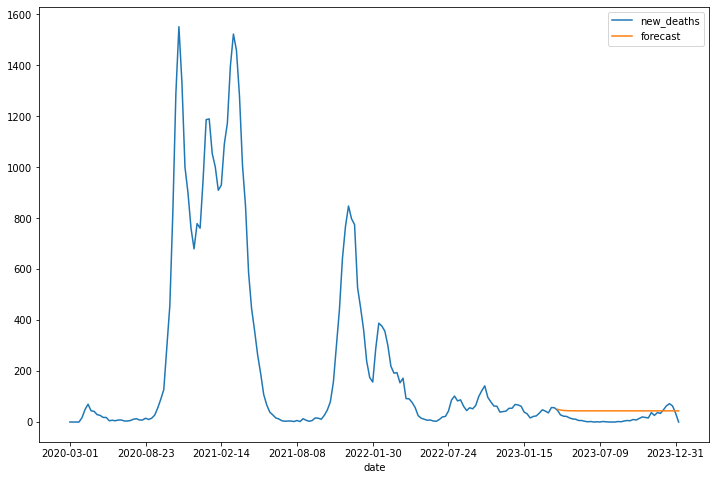

In [231]:
czech['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
czech[['new_deaths','forecast']].plot(figsize=(12,8))

Text(0, 0.5, 'New Deaths')

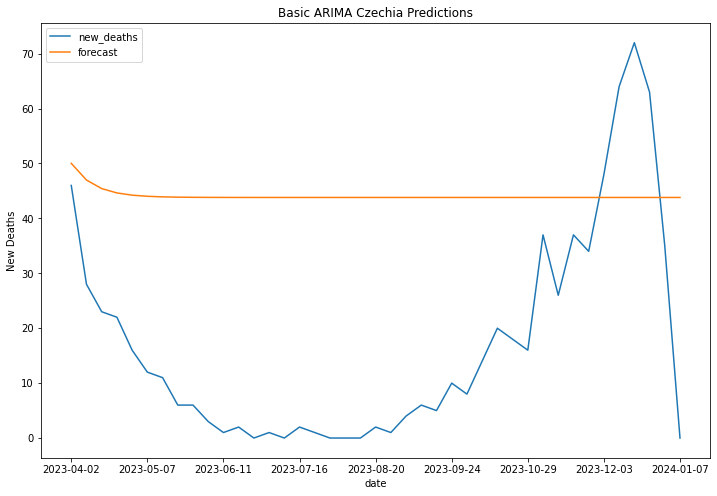

In [232]:
czech_test['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
czech_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Czechia Predictions')
plt.ylabel('New Deaths')

In [233]:
actuals = czech_test['new_deaths']  
predictions = czech_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a czech',mae, mase]

In [234]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321


In [235]:
results=[]
for p in range(0,3):
    for q in range(0,3):
        model=ARIMA(czech_train['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
7,2,1,1809.368437
8,2,2,1811.107420
6,2,0,1813.130142
4,1,1,1815.592965
5,1,2,1816.988740
2,0,2,1820.796323
3,1,0,1821.168075
1,0,1,1832.961045
0,0,0,1911.757113


Text(0, 0.5, 'New Deaths')

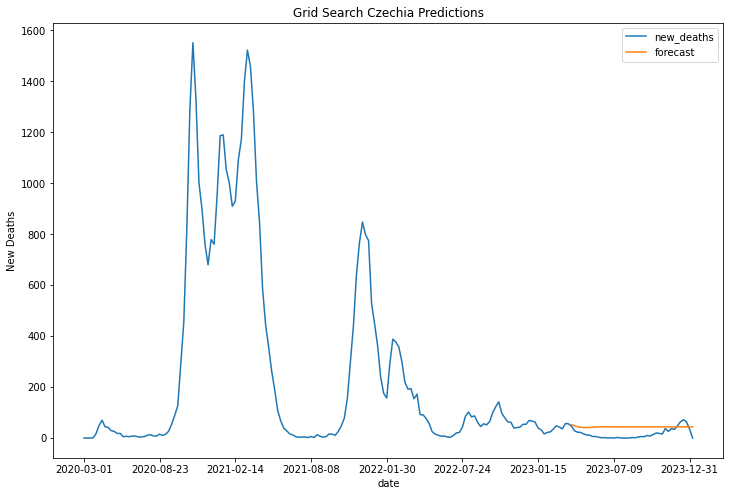

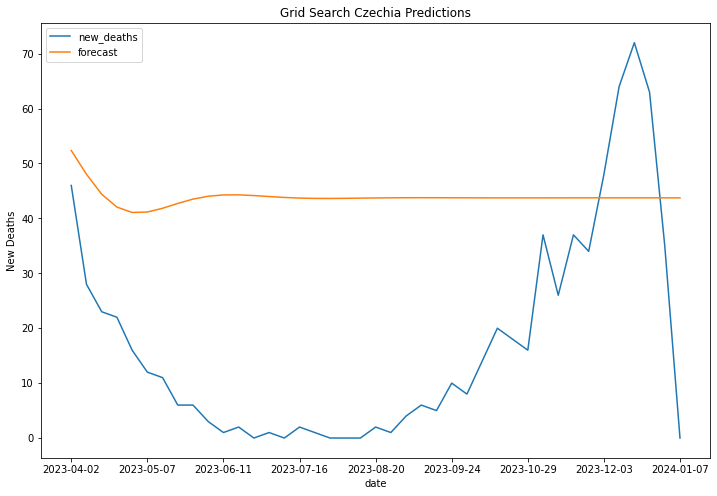

In [236]:
model=ARIMA(czech_train['new_deaths'],order=(2,1,1))
cmodel_fit=model.fit()

czech['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
czech[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Grid Search Czechia Predictions')
plt.ylabel('New Deaths')

czech_test['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
czech_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Grid Search Czechia Predictions')
plt.ylabel('New Deaths')

In [237]:
czech_test

,new_deaths,diff1,forecast
date,,,
2023-04-02,46.0,-10.0,52.358753
2023-04-09,28.0,-18.0,48.044273
2023-04-16,23.0,-5.0,44.399280
2023-04-23,22.0,-1.0,42.059506
2023-04-30,16.0,-6.0,41.080490
2023-05-07,12.0,-4.0,41.157427
2023-05-14,11.0,-1.0,41.845981
2023-05-21,6.0,-5.0,42.728838
2023-05-28,6.0,0.0,43.508472


In [238]:
czech_test

,new_deaths,diff1,forecast
date,,,
2023-04-02,46.0,-10.0,52.358753
2023-04-09,28.0,-18.0,48.044273
2023-04-16,23.0,-5.0,44.399280
2023-04-23,22.0,-1.0,42.059506
2023-04-30,16.0,-6.0,41.080490
2023-05-07,12.0,-4.0,41.157427
2023-05-14,11.0,-1.0,41.845981
2023-05-21,6.0,-5.0,42.728838
2023-05-28,6.0,0.0,43.508472


In [239]:
actuals = czech_test['new_deaths']  
predictions = czech_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base grid searched czech',mae, mase]

In [240]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188


In [241]:
#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(czech_train['new_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(czech_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
czech_test['seasonal'] = pred
mae = mean_absolute_error(czech_test['new_deaths'], pred)
mase = mean_absolute_scaled_error(czech_test['new_deaths'], czech_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal czech',mae, mase]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22489D+00    |proj g|=  2.11474D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   4.473D-06   6.225D+00
  F =   6.2246440947773483     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.88458D+00    |proj g|=  4.88439D-03

At iterate   10    f=  5.82132D+00    |proj g|=  7.42934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   2.305D-06   5.821D+00
  F =   5.8213237783575495     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89609D+00    |proj g|=  1.22524D-01

At iterate    5    f=  5.87117D+00    |proj g|=  6.41465D-03

At iter

 This problem is unconstrained.



At iterate   45    f=  5.81950D+00    |proj g|=  7.14020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     55      1     0     0   8.404D-06   5.820D+00
  F =   5.8195012944999673     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95831D+00    |proj g|=  1.62833D-02

At iterate    5    f=  5.95805D+00    |proj g|=  1.61408D-03

At iterate   10    f=  5.95768D+00    |proj g|=  1.44057D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93334D+00    |proj g|=  2.92462D-01

At iterate    5    f=  5.85395D+00    |proj g|=  1.05227D-02

At iterate   10    f=  5.85132D+00    |proj g|=  5.82302D-03

At iterate   15    f=  5.82108D+00    |proj g|=  1.28664D-04

At iterate   20    f=  5.82106D+00    |proj g|=  1.55712D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   7.873D-06   5.821D+00
  F =   5.8210543935245278     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.90374D+00    |proj g|=  2.04276D-03

At iterate   10    f=  5.88538D+00    |proj g|=  5.16289D-05

At iterate   15    f=  5.88479D+00    |proj g|=  3.70282D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     24      1     0     0   2.789D-06   5.885D+00
  F =   5.8847923498128702     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79241D+00    |proj g|=  2.22549D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.57863D+00    |proj g|=  1.06409D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   7.403D-06   5.579D+00
  F =   5.5786303902128687     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85037D+00    |proj g|=  3.84648D-02

At iterate    5    f=  5.84575D+00    |proj g|=  7.19960D-03

At iterate   10    f=  5.78010D+00    |proj g|=  1.42156D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83280D+00    |proj g|=  5.35549D-02

At iterate    5    f=  5.77662D+00    |proj g|=  6.87493D-03

At iterate   10    f=  5.59578D+00    |proj g|=  1.08450D-01

At iterate   15    f=  5.57921D+00    |proj g|=  3.63753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     23      1     0     0   8.369D-07   5.579D+00
  F =   5.5792057181448325     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81100D+00    |proj g|=  9.78665D-02

At iterate    5    f=  5.77664D+00    |proj g|=  7.40219D-03

At iterate   10    f=  5.68891D+00    |proj g|=  2.52360D-01

At iterate   15    f=  5.57944D+00    |proj g|=  1.60658D-03

At iterate   20    f=  5.57881D+00    |proj g|=  1.68775D-03

At iterate   25    f=  5.57878D+00    |proj g|=  8.79430D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     36      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.52282D+00    |proj g|=  3.59760D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     26      1     0     0   1.441D-05   5.522D+00
  F =   5.5218898982298050     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87667D+00    |proj g|=  2.05696D-02

At iterate    5    f=  5.87412D+00    |proj g|=  5.21946D-03

At iterate   10    f=  5.82972D+00    |proj g|=  1.81035D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83272D+00    |proj g|=  5.27036D-02

At iterate    5    f=  5.81164D+00    |proj g|=  1.46757D-02

At iterate   10    f=  5.77904D+00    |proj g|=  9.90885D-02

At iterate   15    f=  5.55113D+00    |proj g|=  4.33560D-02

At iterate   20    f=  5.53152D+00    |proj g|=  2.15505D-02

At iterate   25    f=  5.52889D+00    |proj g|=  3.00665D-02

At iterate   30    f=  5.52179D+00    |proj g|=  1.10668D-02

At iterate   35    f=  5.52155D+00    |proj g|=  8.67111D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.81061D+00    |proj g|=  8.46303D-03

At iterate   10    f=  5.80605D+00    |proj g|=  5.19733D-03

At iterate   15    f=  5.58313D+00    |proj g|=  1.70259D-01

At iterate   20    f=  5.52083D+00    |proj g|=  2.88873D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     32      1     0     0   3.551D-06   5.521D+00
  F =   5.5208170024974361     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.79969D+00    |proj g|=  4.32867D-02

At iterate   15    f=  5.56719D+00    |proj g|=  9.27276D-02

At iterate   20    f=  5.52538D+00    |proj g|=  5.03931D-03

At iterate   25    f=  5.52472D+00    |proj g|=  1.81960D-04

At iterate   30    f=  5.52470D+00    |proj g|=  2.93854D-03

At iterate   35    f=  5.52457D+00    |proj g|=  7.80055D-04

At iterate   40    f=  5.52455D+00    |proj g|=  3.65567D-04

At iterate   45    f=  5.52454D+00    |proj g|=  2.02461D-03

At iterate   50    f=  5.52452D+00    |proj g|=  1.49821D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.58817D+00    |proj g|=  1.76112D-01

At iterate   15    f=  5.52655D+00    |proj g|=  4.58249D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   4.232D-06   5.527D+00
  F =   5.5265379206838823     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79223D+00    |proj g|=  1.25019D-02

At iterate    5    f=  5.78821D+00    |proj g|=  2.60671D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.69344D+00    |proj g|=  4.98926D-03

At iterate   10    f=  5.58169D+00    |proj g|=  1.01038D-02

At iterate   15    f=  5.57871D+00    |proj g|=  1.03750D-02

At iterate   20    f=  5.53810D+00    |proj g|=  1.21366D-02

At iterate   25    f=  5.53734D+00    |proj g|=  7.26930D-04

At iterate   30    f=  5.53692D+00    |proj g|=  5.28743D-04

At iterate   35    f=  5.53651D+00    |proj g|=  1.02158D-02

At iterate   40    f=  5.52967D+00    |proj g|=  5.72455D-03

At iterate   45    f=  5.52613D+00    |proj g|=  1.31617D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     86   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.69544D+00    |proj g|=  1.99431D-02

At iterate   10    f=  5.68243D+00    |proj g|=  1.30840D-02

At iterate   15    f=  5.53110D+00    |proj g|=  2.01377D-02

At iterate   20    f=  5.52683D+00    |proj g|=  1.59041D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     32      1     0     0   1.022D-06   5.527D+00
  F =   5.5268276230571525     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.52938D+00    |proj g|=  5.61791D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     21      1     0     0   5.618D-06   5.529D+00
  F =   5.5293803872258955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91719D+00    |proj g|=  7.44959D-02

At iterate    5    f=  5.90870D+00    |proj g|=  6.32899D-03

At iterate   10    f=  5.90565D+00    |proj g|=  6.02573D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91719D+00    |proj g|=  5.07121D-01

At iterate    5    f=  5.68462D+00    |proj g|=  3.96477D-02

At iterate   10    f=  5.67522D+00    |proj g|=  9.21935D-03

At iterate   15    f=  5.51266D+00    |proj g|=  4.55988D-02

At iterate   20    f=  5.51057D+00    |proj g|=  3.80869D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     26      1     0     0   2.671D-06   5.511D+00
  F =   5.5105714387282463     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75209D+00    |proj g|=  1.04590D-01

At iterate    5    f=  5.68124D+00    |proj g|=  2.96583D-02

At iterate   10    f=  5.62799D+00    |proj g|=  1.01634D-01

At iterate   15    f=  5.51378D+00    |proj g|=  1.43042D-02

At iterate   20    f=  5.51331D+00    |proj g|=  3.37064D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     27      1     0     0   3.371D-07   5.513D+00
  F =   5.5133055715716575     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70526D+00    |proj g|=  7.33554D-02

At iterate    5    f=  5.68625D+00    |proj g|=  2.38684D-02

At iterate   10    f=  5.66840D+00    |proj g|=  1.84678D-02

At iterate   15    f=  5.53768D+00    |proj g|=  3.74075D-02

At iterate   20    f=  5.52013D+00    |proj g|=  1.41862D-02

At iterate   25    f=  5.51919D+00    |proj g|=  3.39114D-03

At iterate   30    f=  5.51783D+00    |proj g|=  7.22635D-03

At iterate   35    f=  5.51217D+00    |proj g|=  2.26408D-02

At iterate   40    f=  5.51000D+00    |proj g|=  6.10940D-04

At iterate   45    f=  5.50999D+00    |proj g|=  8.72619D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73379D+00    |proj g|=  3.24624D-02

At iterate    5    f=  5.73134D+00    |proj g|=  4.05494D-03

At iterate   10    f=  5.68127D+00    |proj g|=  7.56196D-02

At iterate   15    f=  5.65114D+00    |proj g|=  2.97247D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   6.048D-07   5.651D+00
  F =   5.6511222023300833     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.68155D+00    |proj g|=  7.78961D-03

At iterate   10    f=  5.67868D+00    |proj g|=  1.15469D-02

At iterate   15    f=  5.59238D+00    |proj g|=  1.48287D-01

At iterate   20    f=  5.51817D+00    |proj g|=  2.27615D-02

At iterate   25    f=  5.51272D+00    |proj g|=  7.28921D-05

At iterate   30    f=  5.51272D+00    |proj g|=  7.45404D-04

At iterate   35    f=  5.51265D+00    |proj g|=  2.50931D-03

At iterate   40    f=  5.51263D+00    |proj g|=  9.81826D-04

At iterate   45    f=  5.51260D+00    |proj g|=  4.18804D-04

At iterate   50    f=  5.51259D+00    |proj g|=  3.90200D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94318D+00    |proj g|=  1.39633D-01

At iterate    5    f=  5.90037D+00    |proj g|=  5.09052D-02

At iterate   10    f=  5.88917D+00    |proj g|=  7.23130D-03

At iterate   15    f=  5.88800D+00    |proj g|=  3.04061D-03

At iterate   20    f=  5.88176D+00    |proj g|=  1.62168D-03

At iterate   25    f=  5.88174D+00    |proj g|=  3.15018D-04

At iterate   30    f=  5.88006D+00    |proj g|=  3.37429D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.68840D+00    |proj g|=  5.34496D-03

At iterate   15    f=  5.51080D+00    |proj g|=  1.45873D-02

At iterate   20    f=  5.50995D+00    |proj g|=  5.45679D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     26      1     0     0   5.457D-06   5.510D+00
  F =   5.5099477406322439     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79271D+00    |proj g|=  3.92811D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76502D+00    |proj g|=  1.10396D-01

At iterate    5    f=  5.69344D+00    |proj g|=  1.81465D-02

At iterate   10    f=  5.68990D+00    |proj g|=  1.31313D-02

At iterate   15    f=  5.57966D+00    |proj g|=  8.03286D-02

At iterate   20    f=  5.57079D+00    |proj g|=  7.27283D-03

At iterate   25    f=  5.55046D+00    |proj g|=  1.76700D-01

At iterate   30    f=  5.51275D+00    |proj g|=  1.73184D-03

At iterate   35    f=  5.51275D+00    |proj g|=  4.87020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   30    f=  5.57557D+00    |proj g|=  1.75841D-02

At iterate   35    f=  5.55771D+00    |proj g|=  2.22566D-02

At iterate   40    f=  5.53084D+00    |proj g|=  1.47061D-01

At iterate   45    f=  5.51138D+00    |proj g|=  7.39618D-03

At iterate   50    f=  5.50972D+00    |proj g|=  2.19072D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     68      1     0     0   2.191D-02   5.510D+00
  F =   5.5097214753789086     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74752D+00    |proj g|=  3.78021D-02

At iterate    5    f=  5.73996D+00    |proj g|=  1.59514D-02

At iterate   10    f=  5.73741D+00    |proj g|=  2.37053D-02

At iterate   15    f=  5.68481D+00    |proj g|=  1.02062D-01

At iterate   20    f=  5.65108D+00    |proj g|=  1.47775D-02

At iterate   25    f=  5.65079D+00    |proj g|=  2.57445D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   

 This problem is unconstrained.


At iterate    5    f=  5.69382D+00    |proj g|=  6.38166D-03

At iterate   10    f=  5.68991D+00    |proj g|=  7.09029D-03

At iterate   15    f=  5.62394D+00    |proj g|=  4.38242D-02

At iterate   20    f=  5.51384D+00    |proj g|=  4.47181D-02

At iterate   25    f=  5.51242D+00    |proj g|=  3.06499D-03

At iterate   30    f=  5.51225D+00    |proj g|=  1.33634D-03

At iterate   35    f=  5.51205D+00    |proj g|=  1.65459D-03

At iterate   40    f=  5.51198D+00    |proj g|=  6.17597D-04

At iterate   45    f=  5.51198D+00    |proj g|=  2.98237D-04

At iterate   50    f=  5.51195D+00    |proj g|=  1.31442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.88426D+00    |proj g|=  1.78646D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     13      1     0     0   6.195D-06   5.884D+00
  F =   5.8842355249008067     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67243D+00    |proj g|=  4.60691D-02

At iterate    5    f=  5.64802D+00    |proj g|=  5.58014D-03

At iterate   10    f=  5.53208D+00    |proj g|=  1.04738D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66666D+00    |proj g|=  6.03629D-02

At iterate    5    f=  5.64667D+00    |proj g|=  2.37933D-02

At iterate   10    f=  5.63429D+00    |proj g|=  4.38376D-02

At iterate   15    f=  5.52852D+00    |proj g|=  2.58319D-02

At iterate   20    f=  5.51340D+00    |proj g|=  1.18718D-02

At iterate   25    f=  5.50878D+00    |proj g|=  7.22095D-03

At iterate   30    f=  5.50855D+00    |proj g|=  5.81895D-05

At iterate   35    f=  5.50855D+00    |proj g|=  1.32399D-03

At iterate   40    f=  5.50846D+00    |proj g|=  2.48772D-03

At iterate   45    f=  5.50843D+00    |proj g|=  1.07682D-03

At iterate   50    f=  5.50842D+00    |proj g|=  9.46604D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.64982D+00    |proj g|=  4.50315D-02

At iterate   10    f=  5.64094D+00    |proj g|=  1.00056D-02

At iterate   15    f=  5.51126D+00    |proj g|=  4.80292D-02

At iterate   20    f=  5.50780D+00    |proj g|=  7.03696D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     27      1     0     0   4.923D-07   5.508D+00
  F =   5.5078033165403983     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   30    f=  5.51094D+00    |proj g|=  7.63237D-04

At iterate   35    f=  5.51093D+00    |proj g|=  9.43714D-05

At iterate   40    f=  5.51093D+00    |proj g|=  1.01354D-03

At iterate   45    f=  5.51090D+00    |proj g|=  1.93863D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     51      1     0     0   1.939D-05   5.511D+00
  F =   5.5109019999885138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  5.76600D+00    |proj g|=  3.84594D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     44      1     0     0   8.900D-06   5.766D+00
  F =   5.7660031131168799     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68041D+00    |proj g|=  8.57985D-02

At iterate    5    f=  5.62544D+00    |proj g|=  1.38777D-02

At iterate   10    f=  5.61285D+00    |proj g|=  7.59608D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  5.53274D+00    |proj g|=  2.77005D-02

At iterate   25    f=  5.52710D+00    |proj g|=  2.00221D-03

At iterate   30    f=  5.52657D+00    |proj g|=  2.12474D-04

At iterate   35    f=  5.52653D+00    |proj g|=  1.23231D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     53      1     0     0   3.775D-05   5.527D+00
  F =   5.5265331036416914     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73676D+00    |proj g|=  7.92403D-02

At iterate    5    f=  5.70548D+00    |proj g|=  6.65784D-03

At iterate   10    f=  5.70292D+00    |proj g|=  1.97418D-02

At iterate   15    f=  5.67230D+00    |proj g|=  2.36594D-02

At iterate   20    f=  5.66951D+00    |proj g|=  3.23195D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   7.587D-06   5.670D+00
  F =   5.6695124203182097     

CONVERG

 This problem is unconstrained.



At iterate   30    f=  5.52811D+00    |proj g|=  1.27474D-03

At iterate   35    f=  5.52737D+00    |proj g|=  9.86146D-03

At iterate   40    f=  5.52630D+00    |proj g|=  1.05256D-03

At iterate   45    f=  5.52624D+00    |proj g|=  6.13698D-04

At iterate   50    f=  5.52618D+00    |proj g|=  6.15469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   6.155D-04   5.526D+00
  F =   5.5261820802830526     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.67358D+00    |proj g|=  1.19621D-02

At iterate   15    f=  5.65469D+00    |proj g|=  5.77091D-02

At iterate   20    f=  5.64606D+00    |proj g|=  1.76600D-02

At iterate   25    f=  5.63165D+00    |proj g|=  2.16319D-02

At iterate   30    f=  5.62977D+00    |proj g|=  8.10072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     39      1     0     0   2.567D-05   5.630D+00
  F =   5.6297675710523771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73206D+00    |proj g|=  2.39195D-01

At iterate    5    f=  5.63182D+00    |proj g|=  2.91907D-02

At iterate   10    f=  5.62140D+00    |proj g|=  4.93304D-03

At iterate   15    f=  5.60937D+00    |proj g|=  4.35397D-02

At iterate   20    f=  5.59935D+00    |proj g|=  3.46653D-02

At iterate   25    f=  5.57012D+00    |proj g|=  3.51867D-02

At iterate   30    f=  5.53096D+00    |proj g|=  1.98892D-02

At iterate   35    f=  5.52981D+00    |proj g|=  7.23916D-03

At iterate   40    f=  5.52926D+00    |proj g|=  2.00590D-03

At iterate   45    f=  5.52911D+00    |proj g|=  5.49852D-04

At iterate   50    f=  5.52911D+00    |proj g|=  8.89906D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65752D+00    |proj g|=  6.29224D-02

At iterate    5    f=  5.63984D+00    |proj g|=  4.52745D-02

At iterate   10    f=  5.63397D+00    |proj g|=  8.64232D-03

At iterate   15    f=  5.57609D+00    |proj g|=  5.52546D-02

At iterate   20    f=  5.51162D+00    |proj g|=  3.03145D-02

At iterate   25    f=  5.50937D+00    |proj g|=  1.34561D-03

At iterate   30    f=  5.50934D+00    |proj g|=  3.25231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82494D+00    |proj g|=  3.87934D-01

At iterate    5    f=  5.64117D+00    |proj g|=  8.55588D-03

At iterate   10    f=  5.63367D+00    |proj g|=  1.67465D-02

At iterate   15    f=  5.62711D+00    |proj g|=  2.62579D-02

At iterate   20    f=  5.56988D+00    |proj g|=  5.15986D-02

At iterate   25    f=  5.52076D+00    |proj g|=  3.09939D-02

At iterate   30    f=  5.51005D+00    |proj g|=  1.47522D-02

At iterate   35    f=  5.50898D+00    |proj g|=  5.25827D-03

At iterate   40    f=  5.50880D+00    |proj g|=  2.88877D-03

At iterate   45    f=  5.50843D+00    |proj g|=  5.17901D-03

At iterate   50    f=  5.50833D+00    |proj g|=  1.13531D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.72917D+00    |proj g|=  3.82782D-02

At iterate   10    f=  5.71577D+00    |proj g|=  1.29332D-02

At iterate   15    f=  5.70935D+00    |proj g|=  1.18946D-02

At iterate   20    f=  5.66838D+00    |proj g|=  1.43417D-02

At iterate   25    f=  5.66709D+00    |proj g|=  1.10839D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   5.671D-07   5.667D+00
  F =   5.6670930681182048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64908D+00    |proj g|=  4.70044D-02

At iterate    5    f=  5.63769D+00    |proj g|=  8.65573D-03

At iterate   10    f=  5.63300D+00    |proj g|=  7.59985D-03

At iterate   15    f=  5.57041D+00    |proj g|=  3.40117D-02

At iterate   20    f=  5.55019D+00    |proj g|=  4.33422D-02

At iterate   25    f=  5.51730D+00    |proj g|=  3.22302D-02

At iterate   30    f=  5.51142D+00    |proj g|=  1.38150D-02

At iterate   35    f=  5.50920D+00    |proj g|=  1.20565D-03

At iterate   40    f=  5.50918D+00    |proj g|=  3.56823D-04

At iterate   45    f=  5.50918D+00    |proj g|=  1.08451D-04

At iterate   50    f=  5.50916D+00    |proj g|=  6.99761D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71223D+00    |proj g|=  1.30571D-01

At iterate    5    f=  5.68933D+00    |proj g|=  1.24671D-02

At iterate   10    f=  5.68331D+00    |proj g|=  1.37599D-02

At iterate   15    f=  5.67585D+00    |proj g|=  2.71819D-02

At iterate   20    f=  5.62739D+00    |proj g|=  4.86258D-02

At iterate   25    f=  5.61175D+00    |proj g|=  1.04516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     34      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71507D+00    |proj g|=  1.04772D-01

At iterate    5    f=  5.65358D+00    |proj g|=  5.74594D-02

At iterate   10    f=  5.63378D+00    |proj g|=  5.08093D-03

At iterate   15    f=  5.62076D+00    |proj g|=  5.07572D-02

At iterate   20    f=  5.56533D+00    |proj g|=  4.18655D-02

At iterate   25    f=  5.51023D+00    |proj g|=  2.31845D-02

At iterate   30    f=  5.50950D+00    |proj g|=  8.69625D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   30    f=  5.51258D+00    |proj g|=  2.89437D-04

At iterate   35    f=  5.51251D+00    |proj g|=  1.44183D-03

At iterate   40    f=  5.51212D+00    |proj g|=  4.53460D-03

At iterate   45    f=  5.50763D+00    |proj g|=  2.06860D-03

At iterate   50    f=  5.50762D+00    |proj g|=  7.48255D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     69      1     0     0   7.483D-05   5.508D+00
  F =   5.5076217089928701     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.


In [242]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188
2,gs seasonal czech,24.199009,3.999836


Text(0, 0.5, 'New Deaths')

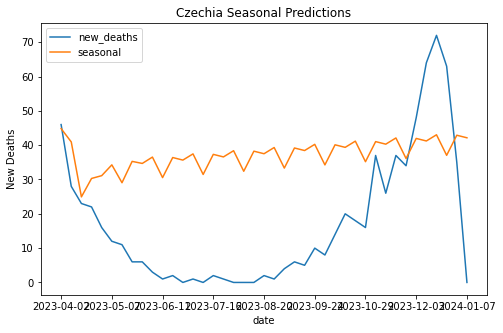

In [243]:
czech_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Czechia Seasonal Predictions')
plt.ylabel('New Deaths')

## Estonia Models - arima, gs arima, sarima 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70321D+00    |proj g|=  1.41220D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.412D-08   4.703D+00
  F =   4.7032129697756515     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.4

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25751D+00    |proj g|=  6.40044D-02

At iterate    5    f=  4.24970D+00    |proj g|=  3.36415D-03

At iterate   10    f=  4.24869D+00    |proj g|=  9.41059D-03

At iterate   15    f=  4.24825D+00    |proj g|=  1.69383D-02

At iterate   20    f=  4.24568D+00    |proj g|=  3.29414D-02

At iterate   25    f=  4.23647D+00    |proj g|=  8.79351D-03

At iterate   30    f=  4.23497D+00    |proj g|=  2.92207D-03

At iterate   35    f=  4.23430D+00    |proj g|=  2.19134D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.32242D+00    |proj g|=  1.35549D-01

At iterate   10    f=  4.19206D+00    |proj g|=  3.63841D-03

At iterate   15    f=  4.19201D+00    |proj g|=  2.94018D-03

At iterate   20    f=  4.19198D+00    |proj g|=  1.68239D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   1.682D-06   4.192D+00
  F =   4.1919794472032095     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.18084D+00    |proj g|=  4.33420D-03

At iterate   25    f=  4.17974D+00    |proj g|=  1.82798D-03

At iterate   30    f=  4.17927D+00    |proj g|=  3.53297D-03
  ys=-7.915E-05  -gs= 2.082E-04 BFGS update SKIPPED

At iterate   35    f=  4.17910D+00    |proj g|=  7.22842D-04

At iterate   40    f=  4.17902D+00    |proj g|=  4.93275D-04

At iterate   45    f=  4.17901D+00    |proj g|=  4.78893D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     81      2     1     0   3.638D-05   4.179D+00
  F =   4.1790130486451700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


At iterate    5    f=  4.35289D+00    |proj g|=  8.57738D-02

At iterate   10    f=  4.22493D+00    |proj g|=  6.43117D-02

At iterate   15    f=  4.18917D+00    |proj g|=  5.04654D-03

At iterate   20    f=  4.18852D+00    |proj g|=  1.97825D-02

At iterate   25    f=  4.18191D+00    |proj g|=  1.29766D-02

At iterate   30    f=  4.18033D+00    |proj g|=  5.87514D-03

At iterate   35    f=  4.17963D+00    |proj g|=  1.92525D-03

At iterate   40    f=  4.17917D+00    |proj g|=  5.39385D-03

At iterate   45    f=  4.17908D+00    |proj g|=  1.32311D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     61    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.13183D+00    |proj g|=  2.78188D-01

At iterate   30    f=  4.11909D+00    |proj g|=  3.65732D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     45      1     0     0   2.715D-06   4.119D+00
  F =   4.1190854753237849     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.35487D+00    |proj g|=  2.83965D-01

At iterate    5    f=  4.29774D+00    |proj g|=  2.69694D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.11027D+00    |proj g|=  2.35443D-01

At iterate   20    f=  4.10825D+00    |proj g|=  4.07325D-02

At iterate   25    f=  4.10805D+00    |proj g|=  4.73114D-03

At iterate   30    f=  4.10792D+00    |proj g|=  8.51120D-02

At iterate   35    f=  4.09594D+00    |proj g|=  1.45950D-01

At iterate   40    f=  4.07696D+00    |proj g|=  3.23100D-02

At iterate   45    f=  4.07626D+00    |proj g|=  4.49658D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     65      1     0     0   4.497D-06   4.076D+00
  F =   4.0762578756532148     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   20    f=  4.10631D+00    |proj g|=  2.30091D-02

At iterate   25    f=  4.10570D+00    |proj g|=  4.27845D-02

At iterate   30    f=  4.10556D+00    |proj g|=  4.10134D-03

At iterate   35    f=  4.09297D+00    |proj g|=  1.51677D-01

At iterate   40    f=  4.07220D+00    |proj g|=  1.20102D-01

At iterate   45    f=  4.06919D+00    |proj g|=  1.43642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     66      1     0     0   2.620D-05   4.069D+00
  F =   4.0691878157740211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.29890D+00    |proj g|=  5.19179D-02

At iterate   10    f=  4.13885D+00    |proj g|=  3.62762D-01

At iterate   15    f=  4.11827D+00    |proj g|=  3.81609D-01

At iterate   20    f=  4.11034D+00    |proj g|=  1.74751D-02

At iterate   25    f=  4.11029D+00    |proj g|=  2.35788D-02

At iterate   30    f=  4.10255D+00    |proj g|=  1.47889D-01

At iterate   35    f=  4.07850D+00    |proj g|=  8.83293D-02

At iterate   40    f=  4.07650D+00    |proj g|=  5.16921D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     65      1     0     0   3.180D-06   4.076D+00
  F =   4.07649617107

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.34840D+00    |proj g|=  2.54979D-01

At iterate    5    f=  4.29866D+00    |proj g|=  3.04175D-02

At iterate   10    f=  4.14620D+00    |proj g|=  2.74175D-01

At iterate   15    f=  4.14009D+00    |proj g|=  3.38057D-02

At iterate   20    f=  4.10704D+00    |proj g|=  4.93103D-01

At iterate   25    f=  4.10034D+00    |proj g|=  1.03934D-02

At iterate   30    f=  4.08586D+00    |proj g|=  1.45971D-01

At iterate   35    f=  4.06776D+00    |proj g|=  1.78819D-02

At iterate   40    f=  4.06738D+00    |proj g|=  4.71870D-03

At iterate   45    f=  4.06662D+00    |proj g|=  4.11080D-02

At iterate   50    f=  4.06575D+00    |proj g|=  2.05968D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14473D+00    |proj g|=  2.90773D-03

At iterate    5    f=  4.14468D+00    |proj g|=  2.48690D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      9      1     0     0   1.554D-06   4.145D+00
  F =   4.1446782436581060     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.11536D+00    |proj g|=  3.61120D-03

At iterate   15    f=  4.11234D+00    |proj g|=  1.46825D-02

At iterate   20    f=  4.10949D+00    |proj g|=  3.66236D-03

At iterate   25    f=  4.10918D+00    |proj g|=  7.04536D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     29      1     0     0   4.610D-06   4.109D+00
  F =   4.1091785025138154     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   4.148D-07   4.005D+00
  F =   4.0045952582591751     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15110D+00    |proj g|=  3.56500D-01

At iterate    5    f=  3.99981D+00    |proj g|=  2.58689D-03

At iterate   10    f=  3.99772D+00    |proj g|=  9.53116D-03

At iterate   15    f=  3.99430D+00    |proj g|=  5.00726D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  3.99180D+00    |proj g|=  1.88231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     32      1     0     0   1.882D-05   3.992D+00
  F =   3.9917953069117926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20816D+00    |proj g|=  2.27480D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.99783D+00    |proj g|=  2.81961D-02

At iterate   10    f=  3.99613D+00    |proj g|=  1.80958D-02

At iterate   15    f=  3.99321D+00    |proj g|=  2.16853D-02

At iterate   20    f=  3.99275D+00    |proj g|=  1.74145D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   1.741D-06   3.993D+00
  F =   3.9927467972556538     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17516D+00    |proj g|=  4.01972D-01

At iterate    5    f=  3.99335D+00    |proj g|=  3.46633D-03

At iterate   10    f=  3.99259D+00    |proj g|=  3.72553D-03

At iterate   15    f=  3.99187D+00    |proj g|=  6.74194D-03

At iterate   20    f=  3.99146D+00    |proj g|=  3.58476D-03

At iterate   25    f=  3.99140D+00    |proj g|=  2.41408D-04

At iterate   30    f=  3.99129D+00    |proj g|=  6.29455D-03

At iterate   35    f=  3.99107D+00    |proj g|=  5.20280D-04

At iterate   40    f=  3.99106D+00    |proj g|=  7.11284D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98292D+00    |proj g|=  5.17778D-02

At iterate    5    f=  3.97174D+00    |proj g|=  4.73943D-02

At iterate   10    f=  3.96940D+00    |proj g|=  8.43959D-04

At iterate   15    f=  3.96938D+00    |proj g|=  3.15792D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   3.158D-07   3.969D+00
  F =   3.9693761035046489     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   40    f=  3.96135D+00    |proj g|=  2.38916D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     46      1     0     0   2.389D-06   3.961D+00
  F =   3.9613469804637789     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19321D+00    |proj g|=  5.27187D-01

At iterate    5    f=  3.96883D+00    |proj g|=  2.54469D-02

At iterate   10    f=  3.96377D+00    |proj g|=  1.63623D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.24112D+00    |proj g|=  4.14077D-01

At iterate    5    f=  3.98635D+00    |proj g|=  1.66696D-01

At iterate   10    f=  3.96427D+00    |proj g|=  9.60652D-03

At iterate   15    f=  3.96256D+00    |proj g|=  5.95767D-04

At iterate   20    f=  3.96255D+00    |proj g|=  7.01172D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   3.267D-06   3.963D+00
  F =   3.9625506758833007     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  3.96467D+00    |proj g|=  6.54211D-03

At iterate   15    f=  3.96435D+00    |proj g|=  2.94363D-03

At iterate   20    f=  3.96419D+00    |proj g|=  6.81160D-05

At iterate   25    f=  3.96418D+00    |proj g|=  1.60847D-03

At iterate   30    f=  3.96406D+00    |proj g|=  3.95443D-04

At iterate   35    f=  3.96405D+00    |proj g|=  2.92745D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     43      1     0     0   5.587D-06   3.964D+00
  F =   3.9640545911880127     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.



At iterate    5    f=  3.96986D+00    |proj g|=  1.54140D-02

At iterate   10    f=  3.96154D+00    |proj g|=  2.66852D-03

At iterate   15    f=  3.96141D+00    |proj g|=  5.51826D-03

At iterate   20    f=  3.96116D+00    |proj g|=  9.05079D-04

At iterate   25    f=  3.96114D+00    |proj g|=  1.77390D-03

At iterate   30    f=  3.96113D+00    |proj g|=  3.20531D-04

At iterate   35    f=  3.96110D+00    |proj g|=  1.35191D-03

At iterate   40    f=  3.96103D+00    |proj g|=  1.19526D-03

At iterate   45    f=  3.96102D+00    |proj g|=  3.80377D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     47   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29694D+00    |proj g|=  7.19731D-01

At iterate    5    f=  3.98594D+00    |proj g|=  4.86031D-03

At iterate   10    f=  3.98554D+00    |proj g|=  3.41985D-03

At iterate   15    f=  3.98550D+00    |proj g|=  7.60547D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     16      1     0     0   7.605D-06   3.986D+00
  F =   3.9855023028912937     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.98636D+00    |proj g|=  2.46804D-03

At iterate   15    f=  3.98613D+00    |proj g|=  4.04234D-03

At iterate   20    f=  3.98576D+00    |proj g|=  2.28845D-03

At iterate   25    f=  3.98573D+00    |proj g|=  3.12207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   4.626D-05   3.986D+00
  F =   3.9857309551793736     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16495D+00    |proj g|=  4.49321D-01

At iterate    5    f=  3.98564D+00    |proj g|=  7.79540D-03

At iterate   10    f=  3.98366D+00    |proj g|=  4.31526D-03

At iterate   15    f=  3.98356D+00    |proj g|=  8.37957D-04

At iterate   20    f=  3.98348D+00    |proj g|=  2.93220D-03

At iterate   25    f=  3.98343D+00    |proj g|=  2.15513D-03

At iterate   30    f=  3.98341D+00    |proj g|=  7.26570D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97997D+00    |proj g|=  2.24073D-02

At iterate    5    f=  3.97916D+00    |proj g|=  6.37579D-03

At iterate   10    f=  3.97827D+00    |proj g|=  5.62770D-04

At iterate   15    f=  3.97825D+00    |proj g|=  8.58266D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   2.938D-06   3.978D+00
  F =   3.9782526134871290     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.97004D+00    |proj g|=  3.59579D-03

At iterate   10    f=  3.96848D+00    |proj g|=  4.53092D-03

At iterate   15    f=  3.96832D+00    |proj g|=  4.14524D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     21      1     0     0   8.453D-06   3.968D+00
  F =   3.9682784324142450     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18728D+00    |proj g|=  1.64216D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15329D+00    |proj g|=  4.11964D-01

At iterate    5    f=  3.97906D+00    |proj g|=  3.99573D-03

At iterate   10    f=  3.97673D+00    |proj g|=  1.97194D-03

At iterate   15    f=  3.97652D+00    |proj g|=  1.94065D-03

At iterate   20    f=  3.97402D+00    |proj g|=  2.74724D-02

At iterate   25    f=  3.96873D+00    |proj g|=  9.97989D-03

At iterate   30    f=  3.96833D+00    |proj g|=  1.62685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     40     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.97073D+00    |proj g|=  8.03713D-03

At iterate   15    f=  3.97043D+00    |proj g|=  5.81617D-03

At iterate   20    f=  3.97032D+00    |proj g|=  7.05802D-04

At iterate   25    f=  3.96942D+00    |proj g|=  2.33725D-02

At iterate   30    f=  3.96812D+00    |proj g|=  2.70779D-03

At iterate   35    f=  3.96807D+00    |proj g|=  6.03451D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     40      1     0     0   6.035D-06   3.968D+00
  F =   3.9680670955747424     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   35    f=  3.96808D+00    |proj g|=  1.81787D-03

At iterate   40    f=  3.96800D+00    |proj g|=  4.95488D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     61      1     0     0   1.785D-05   3.968D+00
  F =   3.9679981107497211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14942D+00    |proj g|=  4.34822D-01

At iterate    5    f=  3.97043D+00    |proj g|=  7.30822D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  3.96834D+00    |proj g|=  1.51745D-04

At iterate   25    f=  3.96833D+00    |proj g|=  3.33626D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     31      1     0     0   3.233D-06   3.968D+00
  F =   3.9683345496619582     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98248D+00    |proj g|=  5.32283D-02

At iterate    5    f=  3.97021D+00    |proj g|=  1.82406D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.97086D+00    |proj g|=  1.53795D-02

At iterate   10    f=  3.96365D+00    |proj g|=  1.16009D-02

At iterate   15    f=  3.96336D+00    |proj g|=  9.38667D-04

At iterate   20    f=  3.96329D+00    |proj g|=  6.41110D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   5.694D-05   3.963D+00
  F =   3.9632912136244114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.96500D+00    |proj g|=  1.38618D-02

At iterate   15    f=  3.96381D+00    |proj g|=  7.84381D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     22      1     0     0   1.073D-05   3.964D+00
  F =   3.9638051231320564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19504D+00    |proj g|=  5.32289D-01

At iterate    5    f=  3.96914D+00    |proj g|=  1.85513D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.97187D+00    |proj g|=  1.61132D-02

At iterate   10    f=  3.96412D+00    |proj g|=  6.72775D-03

At iterate   15    f=  3.96341D+00    |proj g|=  5.24995D-03

At iterate   20    f=  3.96335D+00    |proj g|=  1.25284D-03

At iterate   25    f=  3.96329D+00    |proj g|=  6.58684D-04

At iterate   30    f=  3.96328D+00    |proj g|=  6.36497D-05

At iterate   35    f=  3.96328D+00    |proj g|=  4.82886D-04

At iterate   40    f=  3.96324D+00    |proj g|=  1.46797D-03

At iterate   45    f=  3.96318D+00    |proj g|=  7.70969D-04

At iterate   50    f=  3.96317D+00    |proj g|=  9.71453D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17645D+00    |proj g|=  4.93672D-01

At iterate    5    f=  3.97229D+00    |proj g|=  1.59328D-02

At iterate   10    f=  3.96400D+00    |proj g|=  1.07956D-02

At iterate   15    f=  3.96380D+00    |proj g|=  2.36617D-03

At iterate   20    f=  3.96380D+00    |proj g|=  3.91463D-04

At iterate   25    f=  3.96377D+00    |proj g|=  2.00693D-04

At iterate   30    f=  3.96377D+00    |proj g|=  6.90191D-04

At iterate   35    f=  3.96370D+00    |proj g|=  1.47892D-03

At iterate   40    f=  3.96366D+00    |proj g|=  5.44760D-04

At iterate   45    f=  3.96366D+00    |proj g|=  5.15779D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   20    f=  3.96109D+00    |proj g|=  9.16257D-04

At iterate   25    f=  3.96101D+00    |proj g|=  2.14465D-03

At iterate   30    f=  3.96100D+00    |proj g|=  5.51830D-04

At iterate   35    f=  3.96097D+00    |proj g|=  3.40508D-03

At iterate   40    f=  3.96091D+00    |proj g|=  1.63680D-03

At iterate   45    f=  3.96091D+00    |proj g|=  1.25985D-04

At iterate   50    f=  3.96091D+00    |proj g|=  3.65589D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   3.656D-05   3.961D+00
  F =   3.9609083850962863     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


<Axes: xlabel='date'>

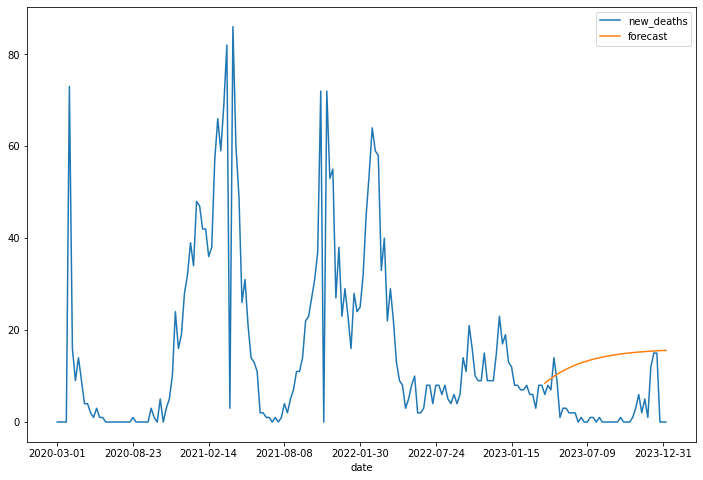

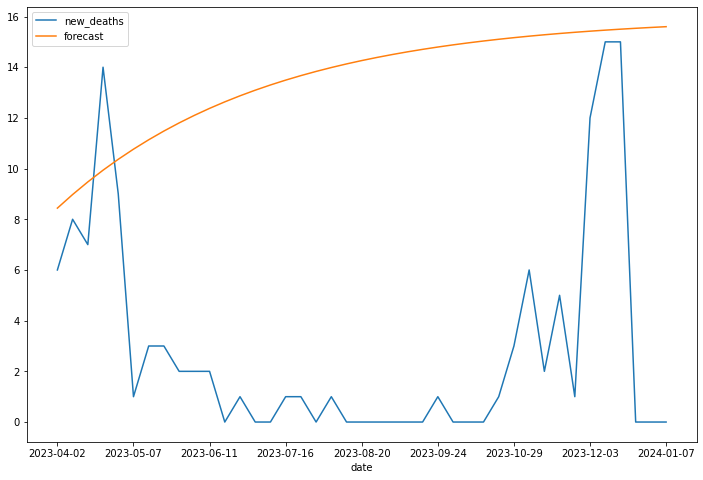

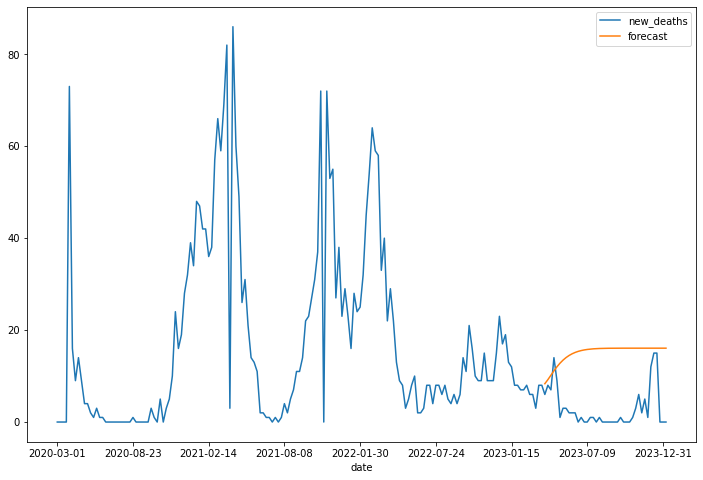

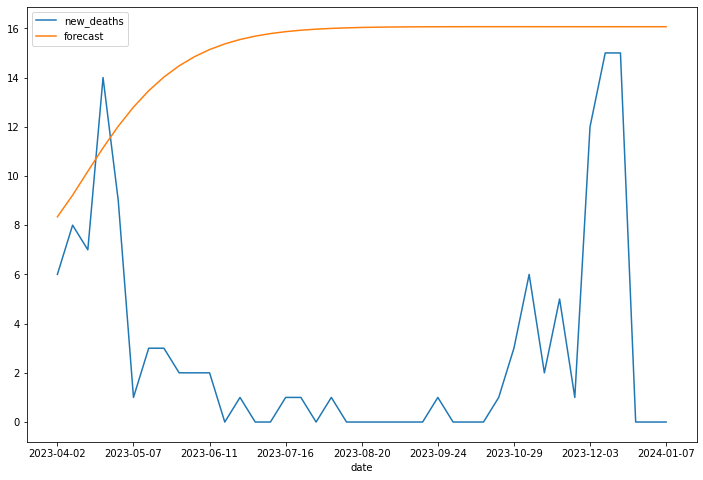

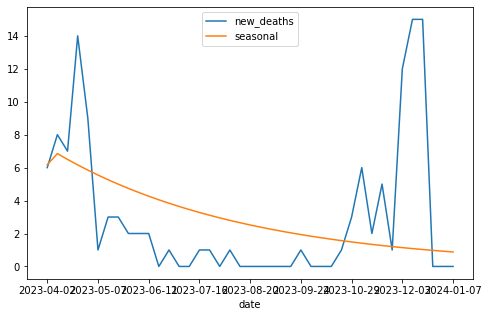

In [244]:
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(eston_train['new_deaths'],order=(1,0,1))
emodel_fit=model.fit()

eston['forecast']=emodel_fit.predict(start=161,end=202,dynamic=True)
eston[['new_deaths','forecast']].plot(figsize=(12,8))
eston_test['forecast']=emodel_fit.predict(start=161,end=202,dynamic=True)
eston_test[['new_deaths','forecast']].plot(figsize=(12,8))
actuals = eston_test['new_deaths']  
predictions = eston_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a eston',mae, mase]


results = []
for p in range(0,3):
    for q in range(0,3):
        model=ARIMA(eston_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model=ARIMA(eston_train['new_deaths'],order=(p,0,q))
e_model_fit=model.fit()

eston['forecast']=e_model_fit.predict(start=161,end=202,dynamic=True)
eston[['new_deaths','forecast']].plot(figsize=(12,8))

eston_test['forecast']=e_model_fit.predict(start=161,end=202,dynamic=True)
eston_test[['new_deaths','forecast']].plot(figsize=(12,8))

actuals = eston_test['new_deaths']  
predictions = eston_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched eston',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(eston_train['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(eston_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
eston_test['seasonal'] = pred
mae = mean_absolute_error(eston_test['new_deaths'], eston_test['seasonal'])
mase = mean_absolute_scaled_error(eston_test['new_deaths'], eston_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal eston',mae, mase]

metrics_df
eston_test[['new_deaths','seasonal']].plot(figsize=(8,5))